In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy
import string
import time
from collections import Counter
from sklearn.decomposition import PCA
import re
import seaborn as sns
import string

In [2]:
plain = "THE PROJECT GUTENBERG EBOOK OF OLIVER TWIST"

In [9]:
path = r"data/AustenCount.txt"
count_matrix = pd.read_table(path, header = None)
transition_matrix = np.log(count_matrix + 1)
transition_matrix

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,4.770685,8.805375,8.885718,9.622582,3.610918,7.929126,8.613594,4.820282,9.221379,2.833213,...,10.160182,10.320947,10.458435,7.910591,9.096612,7.936303,5.616771,8.984318,5.049856,9.700637
1,7.777374,5.342334,0.000000,3.583519,10.079036,0.000000,0.000000,3.332205,7.096721,6.839476,...,7.737180,6.815640,6.428105,8.888343,2.302585,0.693147,0.000000,8.358901,0.000000,4.127134
2,9.051110,1.791759,7.519692,3.218876,9.592127,0.000000,0.000000,9.612734,8.121777,0.000000,...,7.955074,3.891820,8.944028,7.870930,0.000000,0.000000,0.000000,7.162397,0.000000,5.789960
3,8.420682,2.397895,2.197225,7.118826,9.691655,5.010635,6.733402,5.823046,9.226706,2.995732,...,7.508239,7.982075,2.302585,7.405496,6.284134,6.100319,0.000000,7.870930,0.000000,11.292291
4,9.945780,5.598422,9.151439,10.396170,9.494617,8.269501,7.647309,6.663133,8.750841,5.252273,...,11.167035,10.081717,9.421735,4.779123,9.146974,7.766841,8.390949,8.656433,2.639057,11.741112
5,8.722417,0.000000,0.693147,0.000000,8.945854,8.164510,0.000000,0.000000,8.564649,0.000000,...,8.627123,3.433987,7.832808,7.799753,0.000000,0.000000,0.000000,5.513429,0.000000,10.244059
6,8.283747,4.521789,0.000000,3.367296,9.027259,3.401197,5.579730,9.201602,8.155362,0.000000,...,8.466110,7.400621,5.384495,7.116394,0.000000,0.000000,0.000000,4.859812,0.693147,10.016727
7,10.578853,6.291569,0.000000,3.555348,11.437986,4.174387,0.000000,4.094345,10.208100,0.000000,...,7.057037,5.937536,8.761237,7.428333,0.000000,6.284134,0.000000,6.259581,0.000000,9.926960
8,8.252967,7.472501,9.116249,8.996280,9.109857,8.447629,8.725832,2.890372,5.087596,0.000000,...,9.168580,10.251888,10.369828,4.736198,8.530504,1.791759,6.120297,0.000000,7.029973,9.534885
9,6.732211,0.000000,0.000000,0.000000,7.331060,0.000000,0.000000,0.000000,1.609438,0.000000,...,0.000000,0.000000,0.000000,7.382746,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
# M = M.apply(lambda x: x / sum(x))

In [5]:
cipher_text = "o abvunr dqr obveybdexrhgesbqhgfe xoseznbwqgpe xoseosevb ervegrsyegtgnaosgeokeybdesbqhgfeo ewyejno ovueybdnebjveabfgeybdepds exrhgewggvekrpoqornejo xe xgepr gnorqe rdux eove xosesgpgs gneeexbzge xr eybdegvcbye xoseabdnsgervfe xr e xgepg xbfseybdeqgrnvgfe"
cipher_arr = np.array(list(cipher_text))

In [6]:
def scores(T, M):
    score = 0
    for k in range(len(T) - 1):
        L = np.array(list("abcdefghijklmnopqrstuvwxyz "))
        i, j = np.where(L == T[k])[0][0], np.where(L == T[k+1])[0][0]
        score += M.iloc[i, j]
    return score

In [7]:
def transform(T):
    X = copy.copy(T)
    L = np.array(list("abcdefghijklmnopqrstuvwxyz "))
    i, j = np.random.choice(range(27), 2, replace = False)
    letter1 , letter2 = L[i], L[j]
    C1, C2 = np.where(X == letter1), np.where(X == letter2)
#     print(letter1, letter2)
    X[C1] = letter2
    X[C2] = letter1
    return X

In [8]:
original_score = scores(cipher_arr, transition_matrix)
for k in range(30000):
    proposal_cipher_arr = transform(cipher_arr)
    proposal_score = scores(proposal_cipher_arr, transition_matrix)

    if np.random.uniform(0, 1) < np.exp(proposal_score - original_score):
        cipher_arr = proposal_cipher_arr
        original_score = proposal_score
    if k % 500 == 0:
        print([k], "".join(cipher_arr))

[0] o abvunr hqr obveybhexrdgesbqdgfe xoseznbwqgpe xoseosevb ervegrsyegtgnaosgeokeybhesbqdgfeo ewyejno ovueybhnebjveabfgeybhephs exrdgewggvekrpoqornejo xe xgepr gnorqe rhux eove xosesgpgs gneeexbzge xr eybhegvcbye xoseabhnsgervfe xr e xgepg xbfseybheqgrnvgfe
[500] i hamyto spo iamedasewoulerapulfe wirebtanplce wireirema eomelordelklthirleivedaserapulfei endegti imyedasteagmehafledasecsr ewoulenllmevocipiotegi we wleco ltiope osyw eime wirerlclr lteeewable wo edaselmxade wirehastrleomfe wo e wlecl wafredaseplotmlfe
[1000] a himyto sco aimedisewoulericulfe warextinclpe warearemi eomelordelkltharleavedisericulfea endegta amyedisteigmehifledisepsr ewoulenllmevopacaotega we wlepo ltaoce osyw eame warerlplr lteeewixle wo ediselmbide warehistrleomfe wo e wlepl wifrediseclotmlfe
[1500] a himyto sco aimedisewourelicurfe walextincrpe walealemi eomerolderkrthalreavediselicurfea endegta amyedisteigmehifredisepsl ewourenrrmevopacaotega we wrepo rtaoce osyw eame walelrprl rteeewixre wo edisermbide w

In [120]:
[cipher_text[i] + cipher_text[i + 1] for i in range(len(cipher_text) - 1)]

[' a',
 'aj',
 'jc',
 'ck',
 'kb',
 'bg',
 'gh',
 'ha',
 'av',
 'vd',
 'dh',
 'ha',
 'a ',
 ' c',
 'ck',
 'kl',
 'lt',
 'tc',
 'cv',
 'vl',
 'lp',
 'ph',
 'hy',
 'yn',
 'nl',
 'lu',
 'uc',
 'cd',
 'dy',
 'yn',
 'nr',
 'rl',
 'la',
 'ap',
 'p ',
 ' u',
 'ul',
 'lo',
 'og',
 'gc',
 'cw',
 'wd',
 'dn',
 'nm',
 'ml',
 'la',
 'ap',
 'p ',
 ' u',
 'ul',
 'l ',
 ' u',
 'ul',
 'lk',
 'kc',
 'ca',
 'al',
 'lh',
 'hk',
 'kl',
 'ln',
 'nh',
 'hu',
 'ut',
 'tl',
 'ln',
 'ns',
 'sn',
 'ng',
 'gj',
 'j ',
 ' u',
 'un',
 'nl',
 'l ',
 ' i',
 'il',
 'lt',
 'tc',
 'cv',
 'vl',
 'lu',
 'uc',
 'cd',
 'dy',
 'yn',
 'nr',
 'rl',
 'l ',
 ' a',
 'al',
 'lw',
 'wt',
 'tl',
 'le',
 'eg',
 'g ',
 ' a',
 'a ',
 ' k',
 'kb',
 'bl',
 'lt',
 'tc',
 'cv',
 'vg',
 'gl',
 'lc',
 'ce',
 'ek',
 'kl',
 'lj',
 'jc',
 'cr',
 'rn',
 'nl',
 'lt',
 'tc',
 'cv',
 'vl',
 'lm',
 'mv',
 'vu',
 'ua',
 'al',
 'lp',
 'ph',
 'hy',
 'yn',
 'nl',
 'lw',
 'wn',
 'nn',
 'nk',
 'kl',
 'li',
 'ih',
 'hm',
 'm ',
 ' d',
 'd ',
 ' h',
 'hg',

In [121]:
Counter([cipher_text[i] + cipher_text[i + 1] for i in range(len(cipher_text) - 1)])

Counter({' a': 4,
         'aj': 1,
         'jc': 3,
         'ck': 2,
         'kb': 2,
         'bg': 1,
         'gh': 1,
         'ha': 5,
         'av': 1,
         'vd': 1,
         'dh': 1,
         'a ': 2,
         ' c': 1,
         'kl': 5,
         'lt': 6,
         'tc': 6,
         'cv': 7,
         'vl': 5,
         'lp': 3,
         'ph': 4,
         'hy': 2,
         'yn': 4,
         'nl': 8,
         'lu': 3,
         'uc': 2,
         'cd': 2,
         'dy': 2,
         'nr': 3,
         'rl': 4,
         'la': 9,
         'ap': 10,
         'p ': 4,
         ' u': 6,
         'ul': 6,
         'lo': 1,
         'og': 1,
         'gc': 1,
         'cw': 1,
         'wd': 1,
         'dn': 2,
         'nm': 2,
         'ml': 1,
         'l ': 4,
         'lk': 1,
         'kc': 1,
         'ca': 1,
         'al': 6,
         'lh': 2,
         'hk': 2,
         'ln': 3,
         'nh': 2,
         'hu': 1,
         'ut': 1,
         'tl': 3,
         'ns': 1,
         

In [68]:
def encrypt(plain):
    strings = string.ascii_lowercase + " "
    shuffled_strings = "".join(random.sample(strings, len(strings)))
    key = dict(zip(strings, shuffled_strings)) 
    trantab = str.maketrans(strings, shuffled_strings)
    chipher_text = str.translate(plain, trantab)
    return chipher_text, key

In [19]:
def encrypt_try(plain):
    strings = "ab"
    shuffled_strings = "ba"
    key = {string: string for string in string.ascii_lowercase + " "}
    key["a"] = "b"
    key["b"] = "a"
    trantab = str.maketrans(strings, shuffled_strings)
    chipher_text = str.translate(plain, trantab)
    return chipher_text, key

In [218]:
def get_counts(cipher_text):
    cipher_counts = np.zeros((27, 27))
    corr_dict = {alphabet: idx for idx, alphabet in enumerate(string.ascii_lowercase + " ")}
    for i in range(len(cipher_text) - 1):
        idx1, idx2 = corr_dict[cipher_text[i]], corr_dict[cipher_text[i + 1]]
        cipher_counts[idx1, idx2] += 1
    cipher_counts = pd.DataFrame(cipher_counts + 1)
    return cipher_counts

In [5]:
def get_score(cipher_text, trans_mat_ref, trans_mat_chipher):
    corr_dict = {alphabet: idx for idx, alphabet in enumerate(string.ascii_lowercase + " ")}
    scores = 0
    for i in range(len(cipher_text) - 1):
        idx1, idx2 = corr_dict[cipher_text[i]], corr_dict[cipher_text[i + 1]]
        scores += trans_mat_chipher[idx1][idx2] * np.log(trans_mat_ref[idx1][idx2])
    return scores

In [6]:
def shuffle_pair(cipher_text):
    X = np.array(list(cipher_text))
    L = np.array(list(string.ascii_lowercase + " "))
    i, j = np.random.choice(range(27), 2, replace = False)
    letter1 , letter2 = L[i], L[j]
    C1, C2 = np.where(X == letter1), np.where(X == letter2)
    X[C1] = letter2
    X[C2] = letter1
    return "".join(X)

In [7]:
# cipher_text = "o abvunr dqr obveybdexrhgesbqhgfe xoseznbwqgpe xoseosevb ervegrsyegtgnaosgeokeybdesbqhgfeo ewyejno ovueybdnebjveabfgeybdepds exrhgewggvekrpoqornejo xe xgepr gnorqe rdux eove xosesgpgs gneeexbzge xr eybdegvcbye xoseabdnsgervfe xr e xgepg xbfseybdeqgrnvgfe"

path = r"data/AustenCount.txt"
trans_mat_ref = pd.read_table(path, header = None) + 1
trans_mat_chipher = get_counts(cipher_text)

NameError: name 'cipher_text' is not defined

In [173]:
start = time.time()
scores = []
best_score = original_score = get_score(cipher_text, trans_mat_ref, trans_mat_chipher)
for k in range(30000):
    proposal_cipher_text = shuffle_pair(cipher_text)
    trans_mat_proposal = get_counts(proposal_cipher_text)
    proposal_score = get_score(proposal_cipher_text, trans_mat_ref, trans_mat_proposal)

    if np.random.uniform(0, 1) < proposal_score / original_score:
        cipher_text = proposal_cipher_text
        original_score = proposal_score
        scores.append(original_score)
        if best_score < original_score:
            best_score = original_score
            best_res = cipher_text
    if k % 1000 == 0:
        print([k], cipher_text)
end = time.time()

[0] ywlocehvwftvwyocsiofsjvzrsxotzr swjyxskhoutrpswjyxsyxscowsvcsrvxisrqrhlyxrsyasiofsxotzr sywsuismhywycesiofhsomcslo rsiofspfxwsjvzrsurrcsavpytyvhsmywjswjrspvwrhyvtswvfejwsycswjyxsxrprxwrhsssjokrswjvwsiofsrcdoiswjyxslofhxrsvc swjvwswjrsprwjo xsiofstrvhcr s
[1000] ezxgvimwzopwzegvksgokfwlbktgplbqkzfetknmgupbhkzfetketkvgzkwvkbwtskbrbmxetbkedksgoktgplbqkezkuskjmezeviksgomkgjvkxgqbksgokhotzkfwlbkubbvkdwhepewmkjezfkzfbkhwzbmewpkzwoifzkevkzfetktbhbtzbmkkkfgnbkzfwzksgokbv gskzfetkxgomtbkwvqkzfwzkzfbkhbzfgqtksgokpbwmvbqk
[2000] fjelucaqjzhqjflu glz dqrn ylhrns jdfy talbhnk jdfy fy ulj qu nqyg npnaefyn fv glz ylhrns fj bg iafjfuc glza liu elsn glz kzyj dqrn bnnu vqkfhfqa ifjd jdn kqjnafqh jqzcdj fu jdfy ynknyjna   dltn jdqj glz nuolg jdfy elzayn qus jdqj jdn knjdlsy glz hnqauns 
[3000] fonilydmoqjmofilwkiqwrmzgw ijzgpworf wudiejgbworf wf wliowmlwgm kwgvgdnf gwfswkiqw ijzgpwfowekwtdfoflywkiqdwitlwnipgwkiqwbq owrmzgwegglwsmbfjfmdwtforworgwbmogdfmjwomqyrowflworf w gbg ogdwwwriugwormowkiqwglcikwo

In [174]:
end - start

47.418683767318726

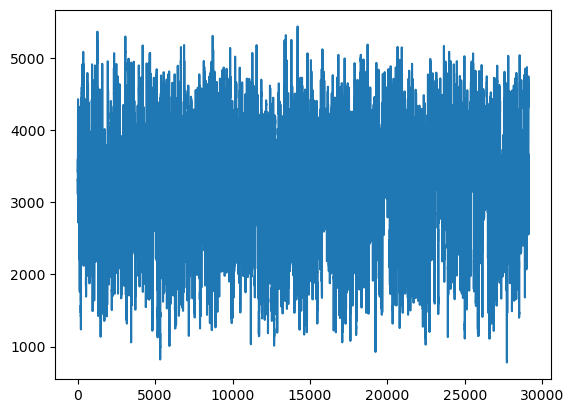

In [175]:
plt.plot(scores)

In [176]:
text = "it congratulation you have solved this problem this is not an easy ekercise if you solved it by writing your own code you must have been familiar with the material taught in this semester hope that you enjoy this course and that the methods you learned"
trans_mat = get_counts(text)
get_score(text, trans_mat_ref, trans_mat)

6151.8964238731105

In [177]:
best_score

5433.689469652556

In [328]:
# plain_text = """Once upon a time there lived a little boy named Peter He lived in an old cottage on the edge of a forest Peter was a very curious boy He always wanted to explore the forest but his mother would not let him go alone One day while Peters mother was busy with her work Peter snuck out of the cottage and ran into the forest He was excited and afraid at the same time The forest was vast and mysterious The trees were huge and towered above him like giants Peter walked deeper and deeper into the forest He was completely lost and could not find his home way back As night fell Peter began looking for a shelter He found a cave somewhere in the forest and decided to spend the night there He curled up in a corner and slept The next morning Peter woke up and saw that he was not alone There in the corner of the cave was a small creature It looked like a talking rabbit but with wings The creature introduced itself as Whiskers and told Peter that it was a forest fairy Whiskers explained that Peter had entered the magical part of the forest where all the creatures were magical and could talk Peter was amazed and excited He talked to Whiskers for hours and learned about the magical world of the forest Whiskers offered to help Peter find his home way back to the cottage Peter agreed and they set off on an adventure through the magical forest They encountered many interesting creatures and overcame many obstacles on their journey After days of adventure Peter finally found his home way back to the cottage He thanked Whiskers for his help and promised to come back and visit the forest one day With a happy heart Peter reunited with his mother who had been worried sick about where he had gone He promised never to venture into the forest alone again but he still cherished the memories of his magical adventure with Whiskers"""
plain_text = war_and_peace
plain_text = plain_text.lower()
cipher_text, key = encrypt(plain_text)

<AxesSubplot: >

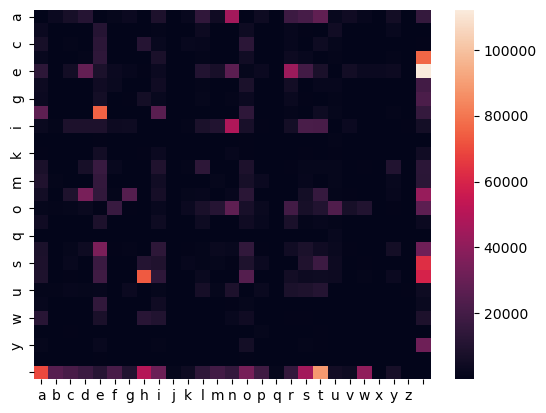

In [329]:
trans_mat_cipher = get_counts(cipher_text)
trans_mat_plain = get_counts(plain_text)

# Rename the columns and index
trans_mat_cipher.rename(columns = {idx: letter for idx, letter in enumerate(string.ascii_lowercase + " ")}, inplace = True)
trans_mat_cipher.index = list(string.ascii_lowercase + " ")
trans_mat_plain.rename(columns = {idx: letter for idx, letter in enumerate(string.ascii_lowercase + " ")}, inplace = True)
trans_mat_plain.index = list(string.ascii_lowercase + " ")

# Heatmap of the reference transition matrix
sns.heatmap(trans_mat_plain)

<AxesSubplot: >

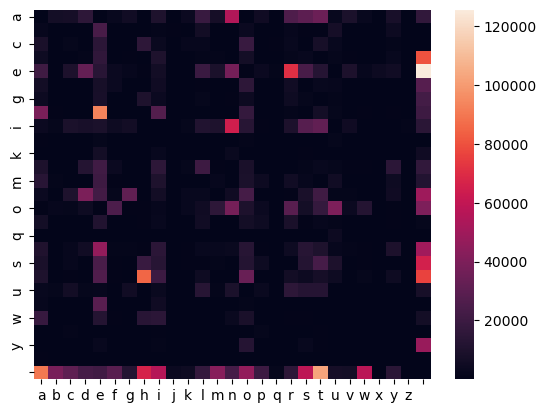

In [330]:
# Austen
path = r"data/AustenCount.txt"
trans_mat_ref = pd.read_table(path, header = None) + 1

# War and Peace
# with open("./data/book-war-and-peace.txt", "r") as f:
#     war_and_peace = f.read()
# war_and_peace = re.sub(r"[^a-zA-Z]", " ", war_and_peace)
# war_and_peace = re.sub(r"\s+", " ", war_and_peace)
# war_and_peace = war_and_peace.lower()
# trans_mat_ref = get_counts(war_and_peace)

# Rename the columns and index
trans_mat_ref.rename(columns = {idx: letter for idx, letter in enumerate(string.ascii_lowercase + " ")}, inplace = True)
trans_mat_ref.index = list(string.ascii_lowercase + " ")

# Heatmap of the reference transition matrix
sns.heatmap(trans_mat_ref)

In [331]:
pca_ref = PCA(n_components=27)
pca_ref.fit(trans_mat_ref)
components_ref = pca_ref.components_

pca_plain = PCA(n_components=27)
pca_plain.fit(trans_mat_plain)
components_plain = pca_plain.components_

pca_cipher = PCA(n_components=27)
pca_cipher.fit(trans_mat_cipher)
components_cipher = pca_cipher.components_

In [334]:
# L1 penalized regression
lambda_ = 0
X = components_cipher

# Reference is its plain text
beta_ols_plain = np.linalg.inv(X.T @ X) @ X.T @ components_plain
beta_ols_plain = (beta_ols_plain > 0) * (np.abs(beta_ols_plain) - lambda_) * ((np.abs(beta_ols_plain) - lambda_) > 0)
comparison_plain = np.argmax(beta_ols_plain, axis=1)

# Reference is from another book
beta_ols_ref = np.linalg.inv(X.T @ X) @ X.T @ components_ref
beta_ols_ref = (beta_ols_ref > 0) * (np.abs(beta_ols_ref) - lambda_) * ((np.abs(beta_ols_ref) - lambda_) > 0)
comparison_ref = np.argmax(beta_ols_ref, axis=1)

In [335]:
# Find the key
strings = string.ascii_lowercase + " "
strings_decrypted_plain = ""
for pos in comparison_plain:
    strings_decrypted_plain += strings[pos]

strings_decrypted_ref = ""
for pos in comparison_ref:
    strings_decrypted_ref += strings[pos]

print(f"Correct Answer: {strings_decrypted_plain}\nAnswer from Reference: {strings_decrypted_ref}")

Correct Answer: pdnq cmgbyvkxfrtwahozsujiel
Answer from Reference: sbnqtkjsmicbzurtvahijbrzpel


In [344]:
X.shape

(27, 27)

In [322]:
strings_decrypted_plain, strings_decrypted_ref

('xeiqzncgjwbthlmfapursoykvd ', 'whiaahmgxsvoekcyappdnlbukt ')

In [311]:
# Decryption
trantab = str.maketrans(strings, strings_decrypted)
decrypted_text = str.translate(cipher_text, trantab)

In [312]:
decrypted_text

'lhmh pplh a oich oehdh kikht a kiookh vlb hacht phohd eh kikht ih ah lkt mlooagh lh oeh htgh ly a yldhno phohd san a khdb mpdilpn vlb eh aksabn sahoht ol hwpkldh oeh yldhno vpo ein cloehd slpkt hlo kho eic gl aklhh lhh tab seikh phohdn cloehd san vpnb sioe ehd sldu phohd nhpmu lpo ly oeh mlooagh aht dah ihol oeh yldhno eh san hwmioht aht aydait ao oeh nach oich oeh yldhno san kano aht cbnohdilpn oeh odhhn shdh epgh aht olshdht avlkh eic kiuh giahon phohd sakuht thhphd aht thhphd ihol oeh yldhno eh san mlcpkhohkb klno aht mlpkt hlo yiht ein elch sab vamu an higeo yhkk phohd vhgah klluihg yld a nehkohd eh ylpht a makh nlchsehdh ih oeh yldhno aht thmitht ol nphht oeh higeo oehdh eh mpdkht pp ih a mldhhd aht nkhpo oeh hhwo cldhihg phohd sluh pp aht nas oeao eh san hlo aklhh oehdh ih oeh mldhhd ly oeh makh san a ncakk mdhaopdh io klluht kiuh a oakuihg davvio vpo sioe sihgn oeh mdhaopdh ihodltpmht ionhky an seinuhdn aht olkt phohd oeao io san a yldhno yaidb seinuhdn hwpkaihht oeao phohd eat

In [337]:
X.shape

(27, 27)

In [338]:
L = [i for i in range(5)]

In [340]:
L[3:10]

[3, 4]